<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/Long_night_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
working_path = Path('/content/drive/MyDrive/LongNight')

In [7]:
!ls /content/drive/MyDrive/LongNight

Neuro-Quiz.gslides  ran.xlsx  spoonerism.xlsx


## RAN results

we need to make a small database of our contols making RAN. We can also add some dyslexics. Build a distribution plot for both accuracy and rt.

In [10]:
ran = pd.read_csv(
    working_path.joinpath('ran.csv'),
    index_col=None
)
ran = ran[ran['ID'] != 'pilot']
ran['Letters2Errors'] = ran['Letters2Errors'].astype(int)
ran['Numbers2Errors'] = ran['Numbers2Errors'].astype(int)

In [34]:
def convert(column_names):
  rt = []
  for name in column_names:
    values = ran[name].values
    for i in values:
      float_value = float(i.replace(',', '.'))
      rt.append(float_value)
  return rt

In [35]:
column_names = ['Letters1RT', 'Letters2RT', 'Numbers1RT', 'Numbers2RT']
rt = convert(column_names)

In [57]:
acc = []
acc.append(ran['Letters1Errors'].values)
acc.append(ran['Letters2Errors'].values)
acc.append(ran['Numbers1errors'].values)
acc.append(ran['Numbers2Errors'].values)

accuracy = []
# Extend the flattened list with each sublist
for sublist in acc:
    accuracy.extend(sublist)

# in one ran list - 50 items
accuracy_percentage = []
for i in accuracy:
  percentage = (50 - i)/50 * 100
  accuracy_percentage.append(percentage)

0
1
21
21


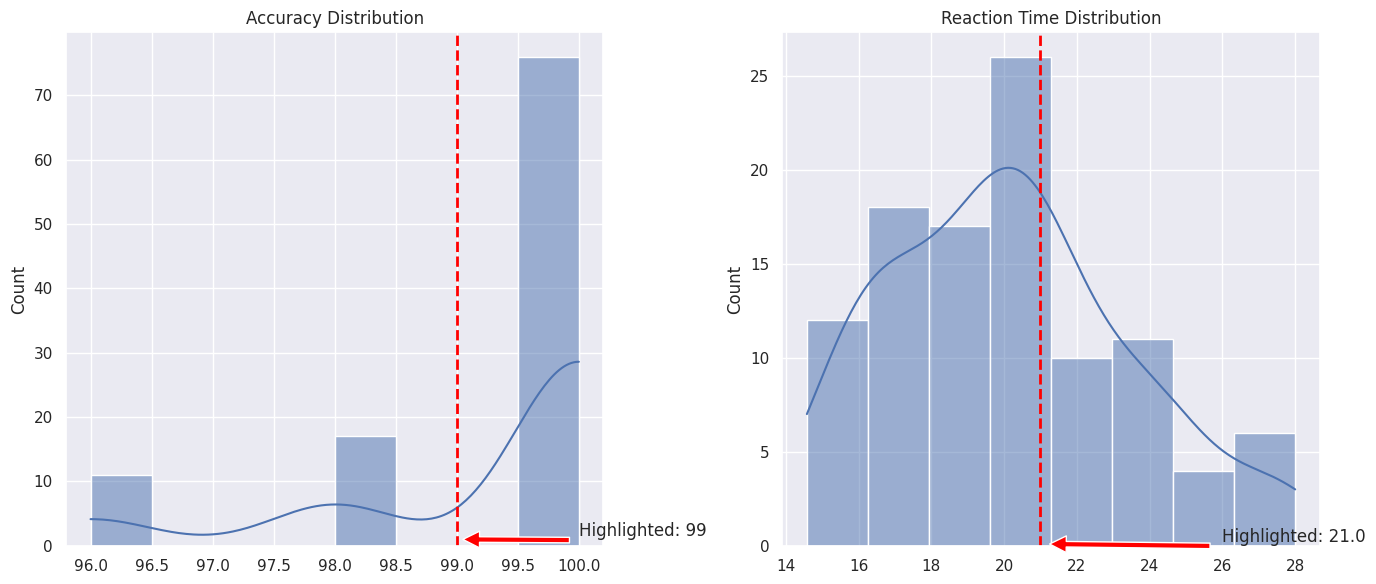

In [64]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the accuracy distribution
sns.histplot(accuracy_percentage, kde=True, ax=axes[0])
axes[0].set_title('Accuracy Distribution')

highlight_value_accuracy1 = int(input('Enter the number of errors for RAN letters')) # for letters
highlight_value_accuracy2 = int(input('Enter the number of errors for RAN numbers')) # for numbers
highlight_value_accuracy =  100 - (highlight_value_accuracy1 + highlight_value_accuracy2)

axes[0].axvline(highlight_value_accuracy, color='red', linestyle='--', linewidth=2)
axes[0].annotate(f'Highlighted: {highlight_value_accuracy}',
                 xy=(highlight_value_accuracy, 1),
                 xytext=(highlight_value_accuracy+1, 1.5),
                 arrowprops=dict(facecolor='red', shrink=0.05))

# Plot the reaction time distribution
sns.histplot(rt, kde=True, ax=axes[1])
axes[1].set_title('Reaction Time Distribution')

highlight_value_rt1 = float(input('Enter the time for RAN letters')) # for letters
highlight_value_rt2 = float(input('Enter the time for RAN numbers')) # for numbers
highlight_value_rt = (highlight_value_rt1 + highlight_value_rt2)/2

axes[1].axvline(highlight_value_rt, color='red', linestyle='--', linewidth=2)
axes[1].annotate(f'Highlighted: {highlight_value_rt}',
                 xy=(highlight_value_rt, 0.1),
                 xytext=(highlight_value_rt+5, 0.2),
                 arrowprops=dict(facecolor='red', shrink=0.05))

# Show the plot
plt.tight_layout()
plt.show()

accuracy_percentage.append(highlight_value_accuracy1)
accuracy_percentage.append(highlight_value_accuracy2)
rt.append(highlight_value_rt1)
rt.append(highlight_value_rt2)


## Spoonerism results

we need to upload the example of the people we have from different sessions. Make a big df and build a frequency plot for accuracy and reaction time.

In [66]:
spoonerism = pd.read_csv(
    working_path.joinpath('spoonerism.csv'),
    index_col=None
)

In [70]:
accuracy = []
for i in spoonerism['Score'].values:
  accuracy.append(i/20*100)

[80.0, 65.0, 75.0, 80.0, 95.0, 90.0, 90.0, 90.0, 90.0, 95.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 85.0, 60.0, 70.0, 100.0, 100.0, 85.0, 90.0, 95.0, 100.0, 80.0, 100.0]


Enter the number of correct responses for spoonerism: 20


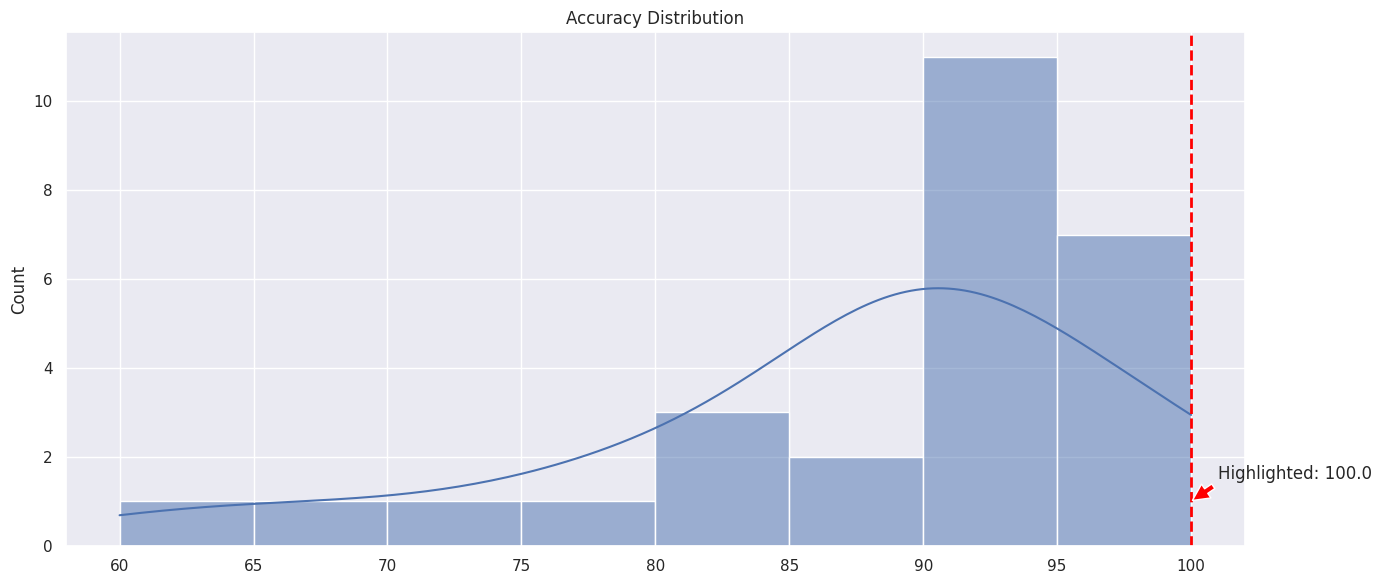

In [76]:
# Create a figure with two subplots
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the accuracy distribution
sns.histplot(accuracy, kde=True, ax=ax, binwidth=5)
ax.set_title('Accuracy Distribution')

acc = int(input("Enter the number of correct responses for spoonerism: "))
highlight_value_accuracy = acc/20*100

ax.axvline(highlight_value_accuracy, color='red', linestyle='--', linewidth=2)
ax.annotate(f'Highlighted: {highlight_value_accuracy}',
                 xy=(highlight_value_accuracy, 1),
                 xytext=(highlight_value_accuracy+1, 1.5),
                 arrowprops=dict(facecolor='red', shrink=0.05))

# Show the plot
plt.tight_layout()
plt.show()

accuracy.append(acc)